In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

vao nc
elbistan tr
severo-kurilsk ru
ushuaia ar
dujuma so
atuona pf
phangnga th
busselton au
dunedin nz
bengkulu id
cape town za
hilo us
severo-kurilsk ru
vilhena br
sorvag fo
buala sb
hilo us
jamestown sh
oudtshoorn za
saint-francois gp
cape town za
grindavik is
rikitea pf
najran sa
atuona pf
puerto ayora ec
gerash ir
butaritari ki
port elizabeth za
gombong id
chokurdakh ru
arraial do cabo br
laguna br
chuy uy
oistins bb
ancud cl
fortuna us
povenets ru
dikson ru
ushuaia ar
upernavik gl
ostrovnoy ru
hilo us
rikitea pf
jamestown sh
nizhneyansk ru
hermanus za
kiama au
bethel us
pochutla mx
khash ir
mazagao br
ribeira grande pt
mys shmidta ru
katsuura jp
saint-philippe re
constitucion cl
chuy uy
santa lucia es
busselton au
jamestown sh
airai pw
upernavik gl
illoqqortoormiut gl
nanortalik gl
burica pa
gavle se
chokurdakh ru
saint-georges gf
barrow us
provideniya ru
buta cd
turayf sa
gazli uz
luderitz na
albany au
ambunti pg
albany au
bluff nz
skelleftea se
katsuura jp
tiksi ru
airai pw
fal

cape town za
phichit th
yerbogachen ru
puerto ayora ec
pattoki pk
klaksvik fo
rikitea pf
mahebourg mu
ilhabela br
ushuaia ar
longyearbyen sj
albany au
nanortalik gl
praia da vitoria pt
lompoc us
belmonte br
banda aceh id
taolanaro mg
puerto ayora ec
sault sainte marie ca
raudeberg no
yellowknife ca
tubruq ly
lolua tv
gotsu jp
faya td
buraydah sa
hobart au
cape town za
karauzyak uz
wuning cn
mys shmidta ru
port alfred za
hermanus za
kapaa us
eureka us
mataura pf
saskylakh ru
atuona pf
berezanka ua
gidole et
husavik is
hobart au
vaini to
albany au
saldanha za
puerto quijarro bo
castro cl
norman wells ca
kavaratti in
robertsport lr
kapaa us
lesnikovo ru
albany au
belushya guba ru
port-gentil ga
jamestown sh
saint-philippe re
hithadhoo mv
busselton au
novokizhinginsk ru
victoria sc
yellowknife ca
berlevag no
hobart au
mahebourg mu
cape town za
souillac mu
dickinson us
rikitea pf
hilo us
sobolevo ru
ushuaia ar
qaanaaq gl
san patricio mx
port alfred za
butaritari ki
steamboat springs us
uper

In [6]:
import requests

from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [21]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

In [9]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [11]:
import requests

from config import weather_api_key

In [12]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | vao
Processing Record 2 of Set 13 | elbistan
Processing Record 3 of Set 13 | severo-kurilsk
Processing Record 4 of Set 13 | ushuaia
Processing Record 5 of Set 13 | dujuma
City not found. Skipping...
Processing Record 6 of Set 13 | atuona
Processing Record 7 of Set 13 | phangnga
Processing Record 8 of Set 13 | busselton
Processing Record 9 of Set 13 | dunedin
Processing Record 10 of Set 13 | bengkulu
Processing Record 11 of Set 13 | cape town
Processing Record 12 of Set 13 | hilo
Processing Record 13 of Set 13 | vilhena
Processing Record 14 of Set 13 | sorvag
City not found. Skipping...
Processing Record 15 of Set 13 | buala
Processing Record 16 of Set 13 | jamestown
Processing Record 17 of Set 13 | oudtshoorn
Processing Record 18 of Set 13 | saint-francois
Processing Record 19 of Set 13 | grindavik
Processing Record 20 of Set 13 | rikitea
Processing Record 21 of Set 13 | najran
Processing Record

Processing Record 35 of Set 16 | tual
Processing Record 36 of Set 16 | rawson
Processing Record 37 of Set 16 | geraldton
Processing Record 38 of Set 16 | barcelona
Processing Record 39 of Set 16 | kanepi
Processing Record 40 of Set 16 | longyearbyen
Processing Record 41 of Set 16 | saint peter
Processing Record 42 of Set 16 | tecoanapa
Processing Record 43 of Set 16 | trinidad
Processing Record 44 of Set 16 | ihosy
Processing Record 45 of Set 16 | zinder
Processing Record 46 of Set 16 | seoul
Processing Record 47 of Set 16 | necochea
Processing Record 48 of Set 16 | barra
Processing Record 49 of Set 16 | cayenne
Processing Record 50 of Set 16 | porto walter
Processing Record 1 of Set 17 | kalabo
Processing Record 2 of Set 17 | orguz
Processing Record 3 of Set 17 | nuevo progreso
Processing Record 4 of Set 17 | tiverton
Processing Record 5 of Set 17 | bolungarvik
City not found. Skipping...
Processing Record 6 of Set 17 | grand-santi
Processing Record 7 of Set 17 | chimbote
Processing R

Processing Record 19 of Set 20 | merauke
Processing Record 20 of Set 20 | tolaga bay
Processing Record 21 of Set 20 | phichit
Processing Record 22 of Set 20 | yerbogachen
Processing Record 23 of Set 20 | pattoki
Processing Record 24 of Set 20 | klaksvik
Processing Record 25 of Set 20 | ilhabela
Processing Record 26 of Set 20 | praia da vitoria
Processing Record 27 of Set 20 | belmonte
Processing Record 28 of Set 20 | banda aceh
Processing Record 29 of Set 20 | sault sainte marie
Processing Record 30 of Set 20 | raudeberg
Processing Record 31 of Set 20 | tubruq
City not found. Skipping...
Processing Record 32 of Set 20 | gotsu
Processing Record 33 of Set 20 | buraydah
Processing Record 34 of Set 20 | karauzyak
City not found. Skipping...
Processing Record 35 of Set 20 | wuning
Processing Record 36 of Set 20 | eureka
Processing Record 37 of Set 20 | berezanka
Processing Record 38 of Set 20 | gidole
Processing Record 39 of Set 20 | puerto quijarro
Processing Record 40 of Set 20 | kavaratt

Processing Record 8 of Set 24 | taltal
Processing Record 9 of Set 24 | barra patuca
Processing Record 10 of Set 24 | shrigonda
Processing Record 11 of Set 24 | high rock
Processing Record 12 of Set 24 | roald
Processing Record 13 of Set 24 | umm lajj
Processing Record 14 of Set 24 | orange
Processing Record 15 of Set 24 | belaya gora
Processing Record 16 of Set 24 | abalak
Processing Record 17 of Set 24 | furstenwalde
Processing Record 18 of Set 24 | vestmannaeyjar
Processing Record 19 of Set 24 | kegayli
City not found. Skipping...
Processing Record 20 of Set 24 | gamba
Processing Record 21 of Set 24 | swan hill
Processing Record 22 of Set 24 | omboue
Processing Record 23 of Set 24 | iqaluit
Processing Record 24 of Set 24 | sivaki
Processing Record 25 of Set 24 | bonfim
Processing Record 26 of Set 24 | saint-augustin
Processing Record 27 of Set 24 | veletma
City not found. Skipping...
Processing Record 28 of Set 24 | hualmay
Processing Record 29 of Set 24 | bokovskaya
Processing Recor

In [14]:
len(city_data)

582

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vao,-22.6667,167.4833,72.09,74,0,14.29,NC,2021-10-26 00:49:10
1,Elbistan,38.2059,37.1983,40.24,62,15,3.74,TR,2021-10-26 00:49:11
2,Severo-Kurilsk,50.6789,156.1250,46.63,77,59,14.63,RU,2021-10-26 00:49:11
3,Ushuaia,-54.8000,-68.3000,35.26,80,20,18.41,AR,2021-10-26 00:45:18
4,Atuona,-9.8000,-139.0333,78.10,72,25,17.11,PF,2021-10-26 00:49:11
5,Phangnga,8.4509,98.5298,84.90,87,100,3.67,TH,2021-10-26 00:49:12
6,Busselton,-33.6500,115.3333,52.05,65,98,1.07,AU,2021-10-26 00:49:12
7,Dunedin,-45.8742,170.5036,59.81,72,93,8.01,NZ,2021-10-26 00:46:08
8,Bengkulu,-3.8004,102.2655,77.59,83,100,2.53,ID,2021-10-26 00:49:12
9,Cape Town,-33.9258,18.4232,63.88,63,0,1.99,ZA,2021-10-26 00:48:01


In [19]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vao,NC,2021-10-26 00:49:10,-22.6667,167.4833,72.09,74,0,14.29
1,Elbistan,TR,2021-10-26 00:49:11,38.2059,37.1983,40.24,62,15,3.74
2,Severo-Kurilsk,RU,2021-10-26 00:49:11,50.6789,156.1250,46.63,77,59,14.63
3,Ushuaia,AR,2021-10-26 00:45:18,-54.8000,-68.3000,35.26,80,20,18.41
4,Atuona,PF,2021-10-26 00:49:11,-9.8000,-139.0333,78.10,72,25,17.11


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [23]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1635211825.40183

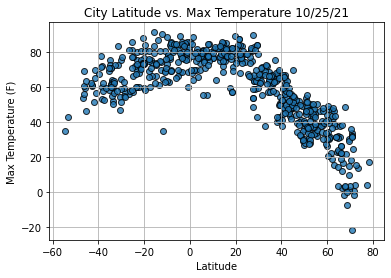

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

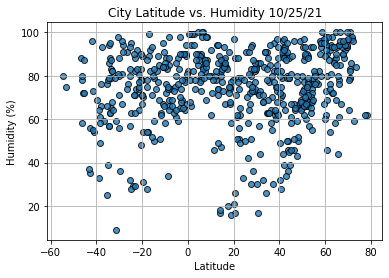

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

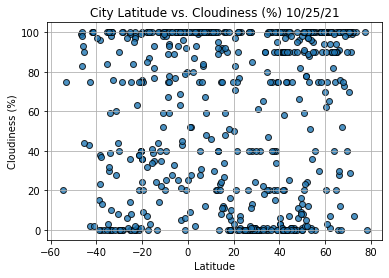

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

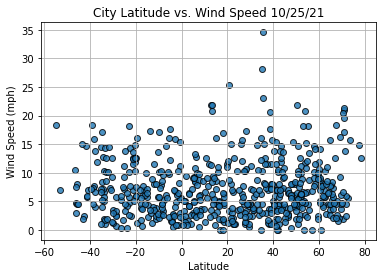

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()